In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [175]:
df = pd.read_csv('Churn_Modelling.csv')

In [176]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [177]:
df.shape

(10000, 14)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [179]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [180]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)

In [182]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [183]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
import tensorflow

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [185]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [186]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 11)                132       
                                                                 
 dense_21 (Dense)            (None, 11)                132       
                                                                 
 dense_22 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [188]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7786 - val_loss: 0.5014 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7972 - val_loss: 0.4620 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.7991 - val_loss: 0.4413 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8055 - val_loss: 0.4285 - val_accuracy: 0.8081
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8153 - val_loss: 0.4131 - val_accuracy: 0.8163
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8278 - val_loss: 0.3971 - val_accuracy: 0.8281
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8363 - val_loss: 0.3837 - val_accuracy: 0.8388

In [189]:
model.layers[0].get_weights()

[array([[ 6.2332523e-01,  2.8559527e-01, -1.8289350e-01, -6.2018752e-02,
          2.3822525e-01, -1.6456899e-01, -1.2254182e-02, -2.7197709e-02,
          7.2232448e-02, -7.4181454e-03,  7.0670694e-02],
        [-6.9536775e-01, -4.2829207e-01,  4.3400899e-01, -7.5687957e-01,
         -6.4785637e-02,  5.1817173e-01, -9.8817432e-01,  1.0490651e+00,
         -8.4330224e-02, -3.3900192e-01, -5.8429235e-01],
        [-6.1009783e-01,  6.3953035e-02,  7.3446631e-02, -4.4779420e-02,
         -1.4369161e-01,  1.3465601e-01,  8.2922846e-02,  2.5626507e-01,
         -8.3237104e-02, -6.7090079e-02,  9.3975231e-02],
        [ 3.1561810e-01,  8.3392620e-02,  2.3177832e-01, -2.1529222e-01,
         -2.1157499e-01, -3.1001579e-02,  2.5415504e-01, -3.9722437e-01,
          1.8949639e-02, -1.1533915e-01, -1.1717379e+00],
        [ 1.5778407e-02, -3.7671423e-01,  8.3297783e-01,  8.8978231e-02,
          1.1216925e+00,  4.7083072e-02, -4.5278868e-01, -5.1096749e-01,
          9.4629276e-01, -1.3193717e+0

In [190]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 981us/step


In [191]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [192]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8615

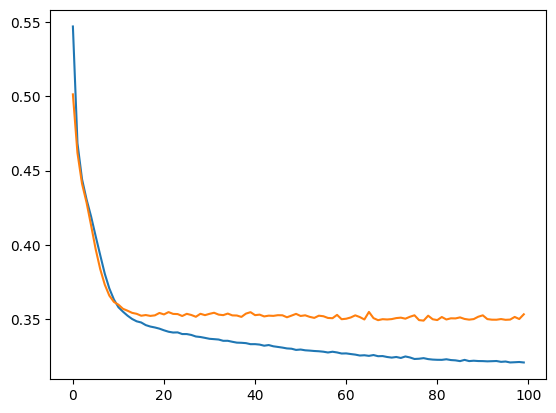

In [194]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

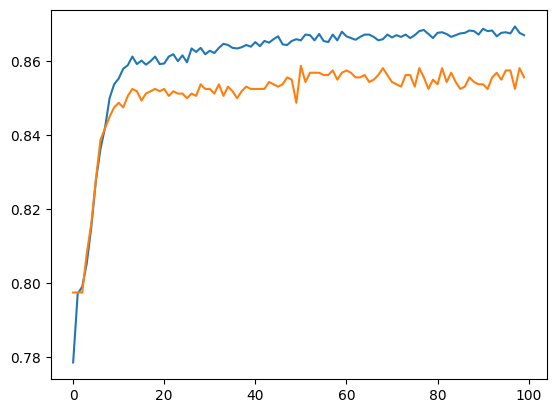

In [197]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])